In [1]:
# Originalquelle der Daten: https://www.kaggle.com/orgesleka/used-cars-database

# Damit ihr euch dort aber nicht registrieren müsst, habe ich mich entschlossen,
# diese auf meinem eigenen Webspace zu hosten. 

import urllib3

url = "http://downloads.codingcoursestv.eu/035%20-%20machine%20learning/data/autos.csv.bz2"

http = urllib3.PoolManager()
download = http.urlopen("GET", url, preload_content = False)  
data = download.read()

with open('autos.csv.bz2', 'wb') as f:  
    f.write(data)

### Ziel: Wir möchten ein Modell entwickeln, welches für *gewöhnliche* Autos den Verkaufspreis schätzen kann

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("./autos.csv.bz2", encoding = "iso8859-1")

# Zuerst entfernen wir Spalten, die für unser Modell keine Aussagekraft haben sollten
df = df.drop(["dateCrawled", "abtest", "dateCreated", "nrOfPictures", "lastSeen", "postalCode", "seller", "offerType"], axis = 1)

# Hier berechnen wir die Spalte "registration", sodass das Jahr als Kommazahl repräsentiert wird 
df["monthOfRegistration"] = np.where(df["monthOfRegistration"] == 0, 6, df["monthOfRegistration"])
df["registration"] = df["yearOfRegistration"] + (df["monthOfRegistration"] - 1) / 12
df = df.drop(["yearOfRegistration", "monthOfRegistration"], axis = 1)

# Wir entfernen alle Einträge, wo die Spalte "price" oder "powerPS" auf 0 ist
df = df.drop(df[df["price"] == 0].index)
df = df.drop(df[df["powerPS"] == 0].index)

df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,ja,2011.333333
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,automatik,163,grand,125000,diesel,jeep,NaN,2004.583333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,ja,1995.750000


In [3]:
df["notRepairedDamage"].unique()

array(['ja', nan, 'nein'], dtype=object)

In [4]:
df["notRepairedDamage"] = np.where(df["notRepairedDamage"] == "ja", 1, df["notRepairedDamage"])
df["notRepairedDamage"] = np.where(df["notRepairedDamage"] == "nein", 0, df["notRepairedDamage"])

In [5]:
df = df[df["notRepairedDamage"].notnull()]

In [6]:
df.head()

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,registration
1,A5_Sportback_2.7_Tdi,18300,coupe,manuell,190,NaN,125000,diesel,audi,1,2011.333333
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,0,2001.416667
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,0,2008.500000
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,1,1995.750000
6,Peugeot_206_CC_110_Platinum,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,0,2004.583333


In [22]:
df = df[(df["price"] < 50000) & (df["powerPS"] < 500) & (df["registration"] <= 2018)]

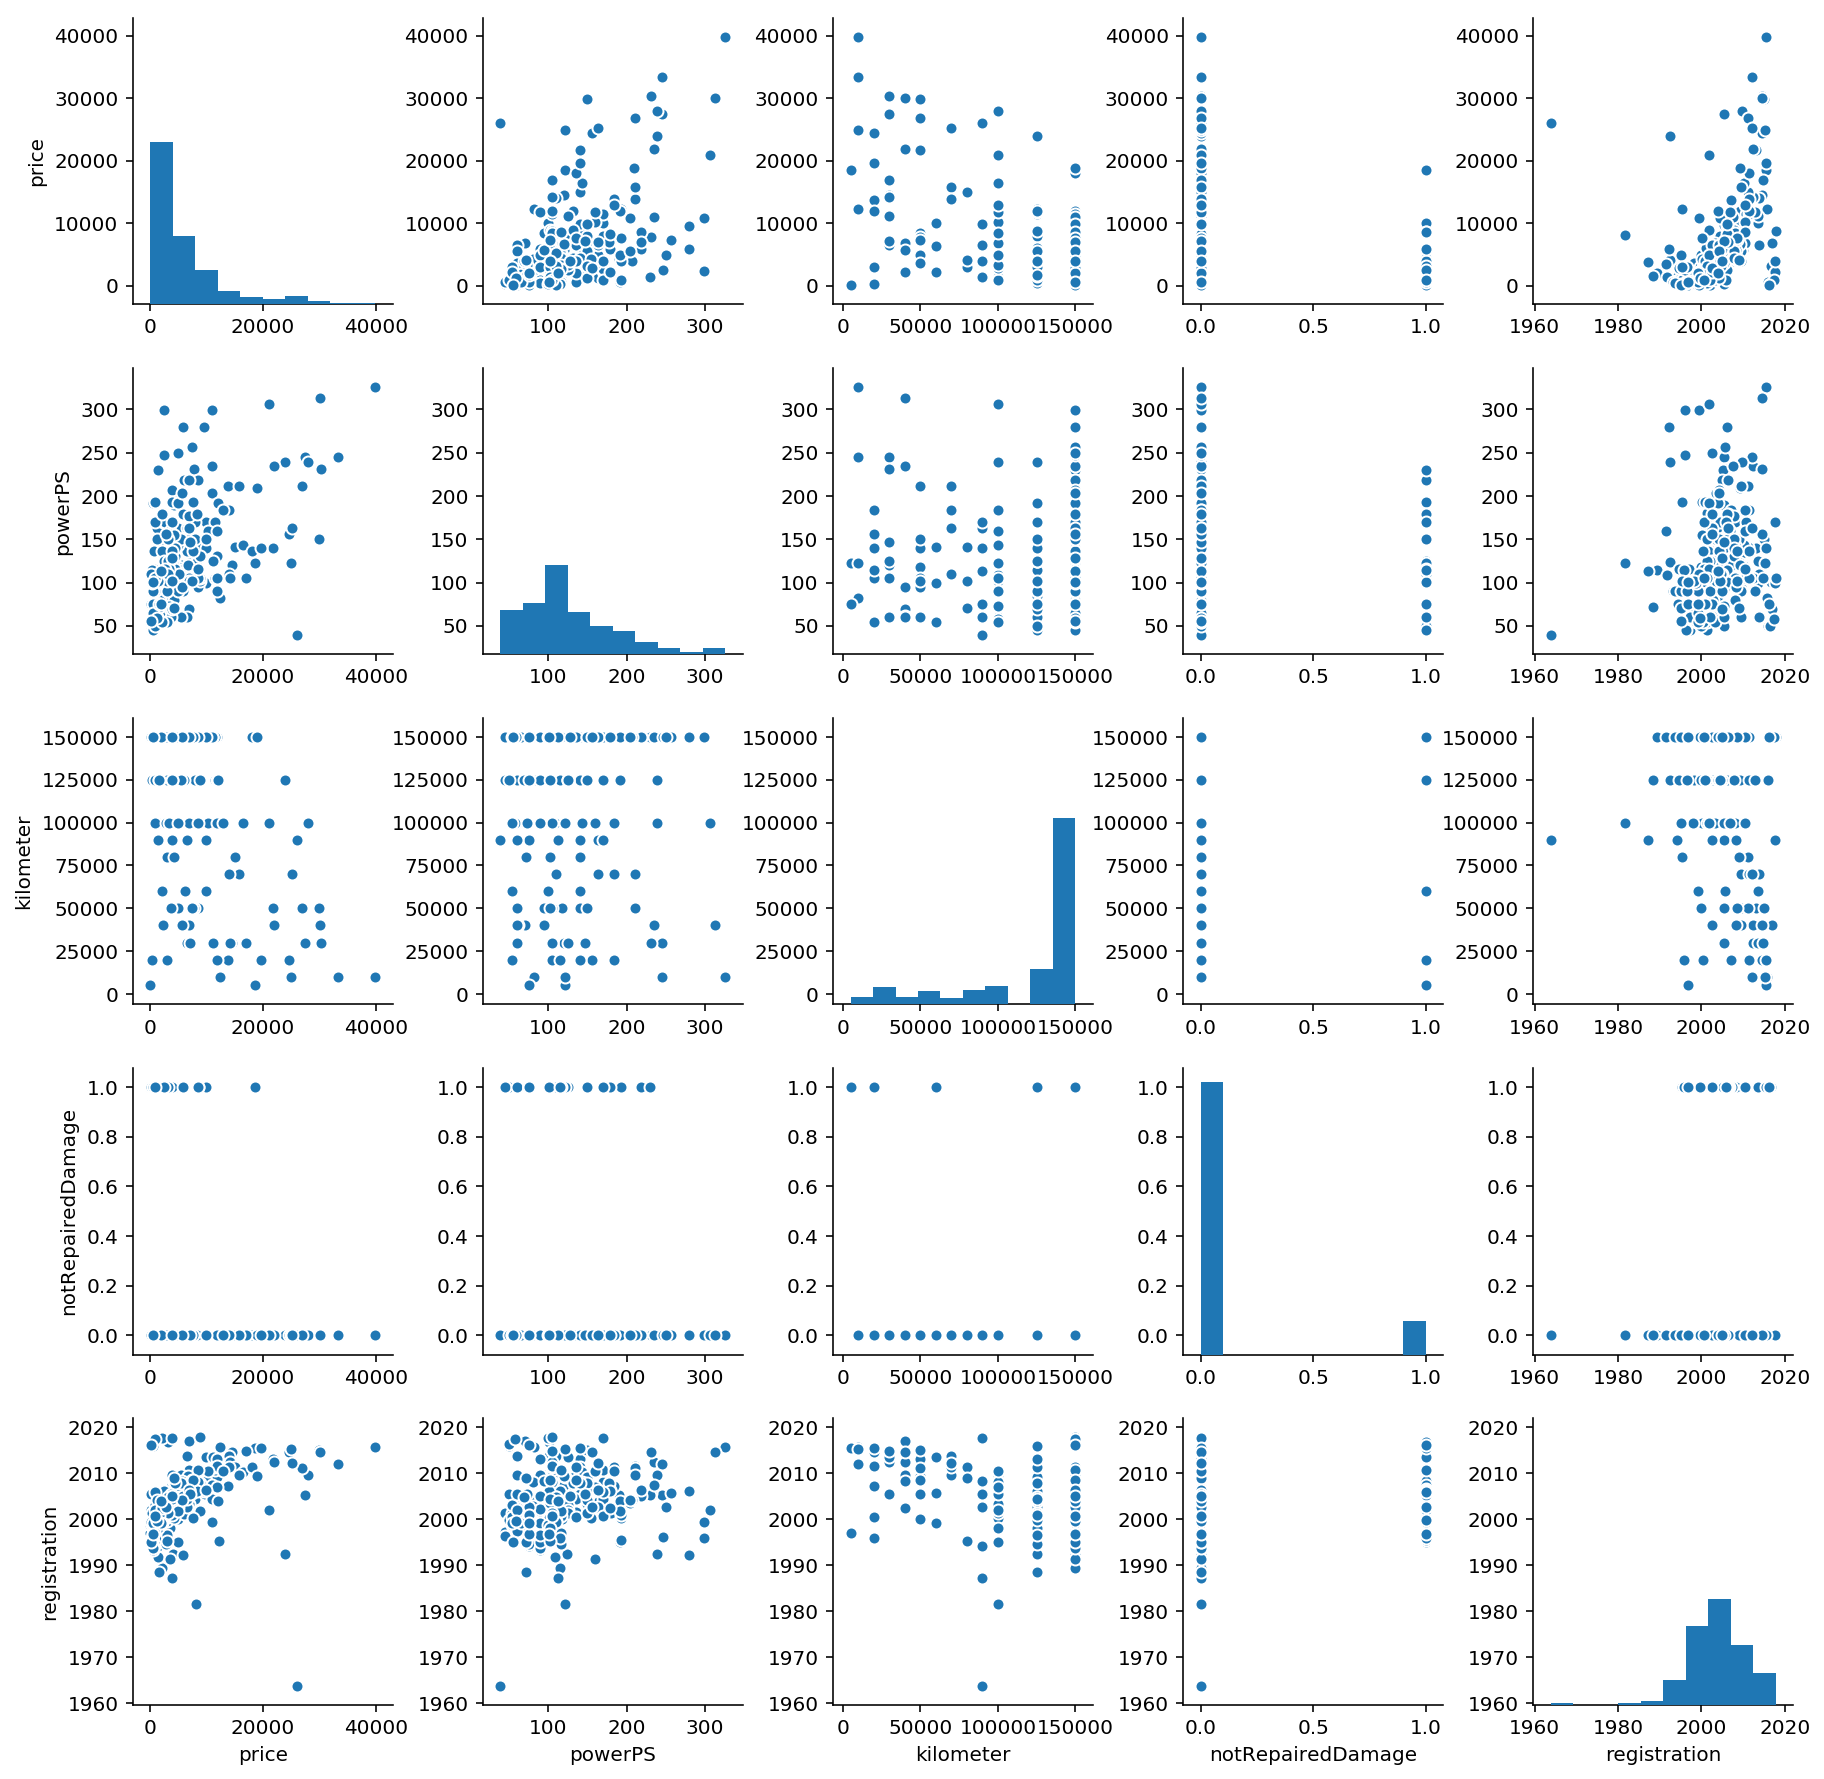

In [27]:
%matplotlib inline
import seaborn as sns

g = sns.pairplot(df.sample(250))